# Examples
We will now perform our first predictions. Consider [this data set](https://drive.google.com/file/d/13HPgfc4HP9UP-gHM2lutJ7MXSt-dAL1d/view?usp=sharing) which tracks various information about grad school applicants, as well as their percentage chance of admission to grad school.

Our aim will be to predict one's chance of getting into grad school. Let's begin by taking a look at the data


In [ ]:
import numpy as np
import pandas as pd

#load the data
data = pd.read_csv('/content/uni_admission.csv')

#displaying the dataset
data.shape

(500, 9)

You should see 500 entries, and 9 columns. Let's also get a description of the data

In [ ]:
data.describe()

,Serial No.,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Let's start by focusing on a single variable: the GRE score 

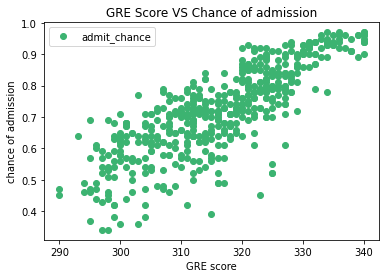

In [ ]:
import matplotlib.pyplot as plt

data.plot(x='GRE', y='admit_chance', style='o',c='mediumseagreen')
plt.title('GRE Score VS Chance of admission')
plt.xlabel('GRE score')
plt.ylabel('chance of admission')
plt.show()



We can clearly see that there is a relationship between GRE scores and chances of admission. While there are some outliers, we will now build a linear regression model to predict admission chance based on GRE results. First, we set up our train and test datasets

In [ ]:
from sklearn.model_selection import train_test_split

X = data['GRE'].values.reshape(-1, 1)
y = data['admit_chance'].values#.reshape(-1, 1)

# Use 20% of the data as test
# The rest will be our training set
GRE_train, GRE_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)



This should be familiar so far, time to actually create the model. We will create a regressor object, and train it using our train data

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(GRE_train, admit_train)

#The fit method will look for our optimal line. More info on this method and others
# at the official documentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

-2.5488126924084584
[0.01033718]


How good is our newly fitted model? Let's feed it the data we saved for testing. We will have the model predict chances of admission based on those GRE scores we set aside, then compare that to the actual chances from the original dataset.

In [ ]:
admit_predict = regressor.predict(GRE_test)

comparison_frame = pd.DataFrame({'Actual': admit_test.flatten(), 'Predicted': admit_predict.flatten()})

comparison_frame.describe()
  

,Actual,Predicted
count,100.00000,100.000000
mean,0.70250,0.706884
std,0.13282,0.115189
min,0.39000,0.500657
25%,0.60000,0.614366
50%,0.70500,0.717738
75%,0.80000,0.800435
max,0.96000,0.945156


Our model is not too bad, although you can see that it can be off, as with the min value. Let's visualize it for a better intuition

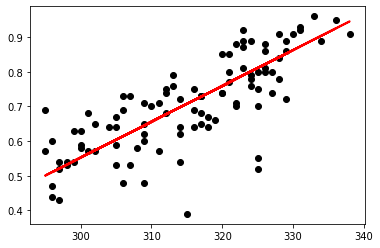

In [ ]:
plt.scatter(GRE_test, admit_test, color='black')
plt.plot(GRE_test, admit_predict, color='red', linewidth=2)
plt.show()

We have some outliers, but our line is nicely centered. While visualizations like this are helpful in assessing our line of best fit, sklearn comes with some crucial metrics for linear regressions

In [ ]:
from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(admit_test, admit_predict))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(admit_test, admit_predict))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(admit_test, admit_predict)))  


Mean Absolute Error: 0.0636984910033071
Mean Squared Error: 0.00726745943092683
Root Mean Squared Error: 0.0852493954871636


How do we make sense of the numbers above? You shoud read through [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) for formal definitions of the metrics above, but bear in mind the following:



*   We will use these metrics (particularly RMSE) to compare models to each other. The lower the value the better.
*   These values are relative to our dependent variable, i.e our dependent variable ranges from 0.39 to 0.96, with a mean of 0.7 and standard deviation of 0.13. This makes an RMSE of 0.085 somewhat acceptable. If our data ranged from 0 to 10, an RMSE of 0.085 would be incredible!

Let's see if we can improve our model by bringing in new independent variables. Let's start by plotting TOEFL scores against admission chance



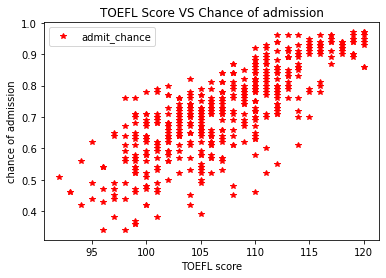

In [ ]:
import matplotlib.pyplot as plt

data.plot(x='TOEFL', y='admit_chance', style='*',color='r')
plt.title('TOEFL Score VS Chance of admission')
plt.xlabel('TOEFL score')
plt.ylabel('chance of admission')
plt.show()


Once again, we can see that there is a relationship between TOEFL score and chance of admission. Let's perform a multivariate linear regression using both GRE and TOEFL scores as independent variables.

In [ ]:
X = data[['GRE', 'TOEFL']].values
y = data['admit_chance'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#intercept
regressor.intercept_


-2.2371735741389545

It is interesting at this point to check the coefficients used by our model, as they indicate how heavily each independent variable contributes to the dependent variable

In [ ]:
regressor.coef_

array([0.00641501, 0.00867603])

In this case, we can see that a single point change in your Toefl score would influence your chances slightly more than a similar 1 point change in GRE scores. 

At this point, let's compare our predicted results to the actual data from the test set:


In [ ]:
y_pred=regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


,Actual,Predicted
count,100.00000,100.000000
mean,0.70250,0.708793
std,0.13282,0.115286
min,0.39000,0.485892
25%,0.60000,0.618885
50%,0.70500,0.701137
75%,0.80000,0.798953
max,0.96000,0.950717


Slight improvements! This should be echoed in our key metrics being smaller than our single variable linear model

In [ ]:
#y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.058487235725409016
Mean Squared Error: 0.006246893942643222
Root Mean Squared Error: 0.07903729463135249


It is now time for some challenges!

# Challenge 1

Using the same dataset, find out which of the available variables has the largest **weight** in predicting acceptance into university.



In [ ]:
#compare TOFL to admittance
x = data['TOEFL'].values.reshape(-1,1)
y = data['admit_chance'].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#find the coefficient and intercept
regressor = LinearRegression()
regressor.fit(x_train,y_train)

print("intercept: ",regressor.intercept_)
print("Coefficient: ",regressor.coef_)



intercept:  -1.243291706522819
Coefficient:  [0.01835484]


In [ ]:
y_pred=regressor.predict(x_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(),'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,100.00000,100.000000
mean,0.70250,0.714803
std,0.13282,0.103037
min,0.39000,0.500418
25%,0.60000,0.628902
50%,0.70500,0.702322
75%,0.80000,0.794096
max,0.96000,0.940935


In [ ]:
#finding the MSE, RMSE
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error 0.058487235725409016
Mean Squared Error 0.006246893942643222
Root Mean Squared Error 0.07903729463135249


# Challenge 2

Take a look at this [dataset](https://drive.google.com/file/d/1cctsp46KVzNKGAK0kLl3mY6wRTDlUBp4/view?usp=sharing) on wine quality. You will have to build a multivariate model that predicts the **quality** of the wine, but with a key constraint: you may only use 4 variables from the 11 independent variables available to you. 

How can you pick the 4 most relevant independent variables? recall your learnings from module 1.

Compute your metrics, and compare with your peers. How did each of you achieve their results? 

Hint: recall reduction techniques, you want to pick independent variables that are as unrelated to each other as possible

In [ ]:
wine = pd.read_csv('/content/winequality-red.csv')
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [ ]:
from sklearn.model_selection import train_test_split
X=wine[['citric acid','residual sugar']].values#.reshape(-1,1)
y=wine[['alcohol']].values

#test with 20%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print("model intercepts at: ",model.intercept_)
print("coefficient of the model is: ",model.coef_)

model intercepts at:  [10.2487645]
coefficient of the model is:  [[0.57001216 0.00394965]]


In [ ]:
y_predict= model.predict(X_test)

from sklearn import metrics
import numpy as np

print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_predict))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_predict))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Mean Absolute Error:  0.8712563628967004
Mean Squared Error:  1.1538956371722862
Root Mean Squared Error:  1.0741953440470156


In [ ]:
# plt.scatter(X_test,y_test,c='black')
# plt.plot(X_test,y_predict,c='red',linewidth=0.2)
# plt.show()